In [1]:
from utils.transforms import *

In [267]:
import imgaug.augmenters as iaa
from torchvision import transforms as T
import numpy as np
from imgaug.augmenters import Augmenter
import cv2

In [57]:
from random import uniform

In [ ]:
class Crop(Augmenter):
    def __init__(self, box_csv, extend_share=(0,1), name=None, deterministic=False, random_state=None):
        super(Crop, self).__init__(name=name, deterministic=deterministic, random_state=random_state)
        self.box_csv = 
        

    def _augment_images(self, images, random_state, parents, hooks):
        for i in range(nb_images):
            if samples[i] == 1:
                images[i] = np.fliplr(images[i])
        return images

    def get_parameters(self):
        return [self.p]

In [ ]:
def crop_img(img):
    return img[:50,:50,:]

def func_images(images, random_state, parents, hooks):
    images = [crop_img(images[i]) for i in range(len(images))]
    return images
    
def func_heatmaps(heatmaps, random_state, parents, hooks):
    return heatmaps
    
def func_keypoints(keypoints_on_images, random_state, parents, hooks):
    return keypoints_on_images

crop_augmenter = iaa.Lambda(
    func_images=func_images,
)

aug = iaa.Sequential([iaa.Fliplr(0.5), crop_augmenter(d=1), iaa.Sometimes(0.2, iaa.AverageBlur(k=(3,3)))]).augment_image

In [51]:
img = np.random.rand(100, 100, 3)

In [ ]:
img_ = aug(img)

In [45]:
img_.shape

(50, 50, 3)

In [2]:
import pandas as pd
from torch.utils.data import DataLoader
from utils import get_augmentation_list, TrainImageDataset, TestImageDataset, DummyDataset3
import os

In [3]:
data_csv = pd.read_csv("/home/kutsenko/projects/happywhale/data/train_.csv")
data_csv['image'] = data_csv['image'].apply(lambda x: x.replace('.jpg', '.png'))
dataset = TrainImageDataset(data_csv[3:10].reset_index(drop=True),
                            '/home/kutsenko/kaggle/segmented/seg_img',
                            transform=None,
                            min_class_num=0,
                            img_size=(512, 512))
# dataset = TestImageDataset('/home/kutsenko/kaggle/segmented/seg_img_test',
#                             transform=None)


In [ ]:
from ffcv.fields import RGBImageField, BytesField, IntField, NDArrayField
from ffcv.writer import DatasetWriter


write_path = '/home/kutsenko/kaggle/ffcv/test.beton'


# writer = DatasetWriter(write_path, {
#     'image': RGBImageField(),
#     'img_name': BytesField()
# }, num_workers=10)
writer = DatasetWriter(write_path, {
    'image': RGBImageField(),
    'label': IntField()
}, num_workers=10)

writer.from_indexed_dataset(dataset)

In [2]:
from ffcv.loader import Loader, OrderOption
from ffcv.transforms import ToTensor, ToDevice, ToTorchImage
from ffcv.fields.decoders import IntDecoder, SimpleRGBImageDecoder, BytesDecoder
from PIL.Image import fromarray
from torch import nn
import torch
from random import uniform

OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [94]:
AUG_SETTINGS = {
    'gausian_blur': {'sigma': ((0, 0.4), (0, 1.6)),
                     'p': (0, 0.5)},
    
    'motion_blur': {'p': (0, 0.4)},
    
    'color_jitter': {'brightness': ((1, 0.8), (1, 1.1)),
                'contrast': ((1, 0.7), (1, 1.17)),
                'saturation': ((1, 0.6),(1, 1.4)),
                'hue': ((0, -0.035), (0, 0.035)),
                'p': (0, 0.6)},
    
    'thin_plate_spline': {'scale': (0, 0.25),
                          'p': (0, 0.35)},
    
    'rotation': {'degrees': ((0, -17), (0, 17)),
                 'p': (0, 0.55)},
    
    'perspective': {'distortion_scale': (0, 0.25),
                    'p': (0, 0.65)},
    
    'cutout1' : {'scale': ((0, 0.02), (0, 0.07)),
                 'p': (0, 0.45)},
    
    'cutout2': {'scale': ((0, 0.015), (0, 0.06)),
                'p': (0, 0.25)},
    
    'resolution': (256, 512)
}


AUG_SETTINGS = {
    'gausian_blur': {'sigma': ((0, 0.1), (0, 1)),
                     'p': (0, 0.3)},
    
    'motion_blur': {'p': (0, 0)},
    
    'color_jitter': {'brightness': ((1, 0.97), (1, 1.03)),
                'contrast': ((1, 0.9), (1, 1.05)),
                'saturation': ((1, 0.85), (1, 1.15)),
                'hue': ((0, -0.01), (0, 0.01)),
                'p': (0, 0.35)},
    
    'thin_plate_spline': {'scale': (0, 0.12),
                          'p': (0, 0.1)},
    
    'rotation': {'degrees': ((0, -7), (0, 7)),
                 'p': (0, 0.2)},
    
    'perspective': {'distortion_scale': (0, 0.15),
                    'p': (0, 0.25)},
    
    'cutout1' : {'scale': ((0, 0.015), (0, 0.06)),
                 'p': (0, 0.25)},
    
    'cutout2': {'scale': ((0, 0.015), (0, 0.06)),
                'p': (0, 0)},
    
    'resolution': (160, 256)
}

In [22]:
import numpy as np
from kornia.augmentation import *
from kornia.augmentation.container import AugmentationSequential
import cv2


augmentation_settings = {
    'gausian_blur': {'sigma': ((0, 0.4), (0, 1.6)),
                     'p': (0, 0.5)},
    
    'motion_blur': {'p': (0, 0.4)},
    
    'color_jitter': {'brightness': ((1, 0.8), (1, 1.1)),
                'contrast': ((1, 0.7), (1, 1.17)),
                'saturation': ((1, 0.6),(1, 1.4)),
                'hue': ((0, -0.035), (0, 0.035)),
                'p': (0, 0.6)},
    
    'thin_plate_spline': {'scale': (0, 0.25),
                          'p': (0, 0.35)},
    
    'rotation': {'degrees': ((0, -17), (0, 17)),
                 'p': (0, 0.55)},
    
    'perspective': {'distortion_scale': (0, 0.25),
                    'p': (0, 0.65)},
    
    'cutout1' : {'scale': ((0, 0.02), (0, 0.07)),
                 'p': (0, 0.45)},
    
    'cutout2': {'scale': ((0, 0.015), (0, 0.06)),
                'p': (0, 0.25)},
    
    'resolution': (160, 256)
}



class Augmenter(nn.Module):
    def __init__(self):
        super().__init__()
        self.aug_list = AugmentationSequential(
            Resize((128, 128))
            # RandomHorizontalFlip(p=1),
            # AugmentationSequential(RandomGaussianBlur(kernel_size=(3, 3), sigma=(1.09, 1.1), p=1),
                                #    RandomMotionBlur(kernel_size=(3, 3), angle=(-90,90), direction=0, p=0.4),
                                  # random_apply=1),
            # )
            # ColorJitter(brightness=(0.8, 1.1),
            #             contrast=(0.7, 1.17),
            #             saturation=(0.6, 1.4),
            #             hue=(-0.035, 0.035),
            #             p=0.6),
            # AugmentationSequential(RandomThinPlateSpline(scale=0.25, p=0.35),
            #                        RandomRotation(degrees=(-17, -17), p=0.55),
            #                        RandomPerspective(distortion_scale=0.25, p=0.65),
            #                        random_apply=1),
            
            # AugmentationSequential(RandomErasing(scale=(0.02, 0.07), ratio=(0.7, 1.3), value=0.0, p=0.45),
            #                        RandomErasing(scale=(0.015, 0.06), ratio=(0.7, 1.3), value=0.0, p=0.25))
            
            
        )
    
    def forward(self, x):
        return self.aug_list(x.type(torch.float32) / 255.)
    

In [163]:
image_pipeline = [SimpleRGBImageDecoder(), ToTensor(), ToTorchImage(), Augmenter()]
# image_pipeline = [SimpleRGBImageDecoder(), ToTensor(), ToTorchImage()]
label_pipeline = [IntDecoder()]

write_path = '/home/kutsenko/kaggle/ffcv/test.beton'
pipelines = {
    'image': image_pipeline,
    'label': label_pipeline
}

loader = Loader(write_path, batch_size=1, num_workers=1,
                order=OrderOption.SEQUENTIAL, pipelines=pipelines)



In [ ]:
for i, x in loader:
    img = np.moveaxis((i[0] * 255.).type(torch.uint8).numpy(), 0, -1)
    # img = i[0]
    break
print(img.shape)
fromarray(img)

In [23]:
import numpy as np
from torch import nn
import torch
import matplotlib.pyplot as plt

In [24]:
from modules.schedulers import ResolutionScheduler, LrRampScheduler

In [42]:
class ProgressiveAugmenter(nn.Module):
    def __init__(self, aug_settings):
        super().__init__()
        self.aug_setttings = aug_settings
        self.stage_len = aug_settings['epochs_max'] // aug_settings['stages_num']
        self.update_augmentation_list(0)
         
       
    @staticmethod
    def inrpolate_value(min, max, scale_coef):
        return min + (max - min) * scale_coef
    
    def update_augmentation_list(self, epoch):
        s = self.aug_setttings
        
        if epoch > self.aug_setttings['epochs_max']:
            stage = self.aug_setttings['stages_num'] - 1
        else:
            stage = epoch // self.stage_len
        
        scale_coef = stage / (self.aug_setttings['stages_num'] - 1)
        
        gblur_s_min = round(self.inrpolate_value(s['gausian_blur']['sigma'][0][0],
                                            s['gausian_blur']['sigma'][0][1],
                                            scale_coef), 3)
        
        gblur_s_max = round(self.inrpolate_value(s['gausian_blur']['sigma'][1][0],
                                            s['gausian_blur']['sigma'][1][1],
                                            scale_coef), 3)
        
        gblur_p = round(self.inrpolate_value(s['gausian_blur']['p'][0],
                                    s['gausian_blur']['p'][1],
                                    scale_coef), 3)
        
        print(f'Gause blure:   MIN: {gblur_s_min}, MAX:{gblur_s_max}, P:{gblur_p}')
        
        mblur_p = round(self.inrpolate_value(s['motion_blur']['p'][0],
                            s['motion_blur']['p'][1],
                            scale_coef), 3)
        
        print(f'Motion blure: P:{mblur_p}')
        
        brightness_min = round(self.inrpolate_value(s['color_jitter']['brightness'][0][0],
                                    s['color_jitter']['brightness'][0][1],
                                    scale_coef), 3)
        
        brightness_max = round(self.inrpolate_value(s['color_jitter']['brightness'][1][0],
                            s['color_jitter']['brightness'][1][1],
                            scale_coef), 3)
        
        print(f'Brithness:   MIN: {brightness_min}, MAX:{brightness_max}')
        
        
        contrast_min = round(self.inrpolate_value(s['color_jitter']['contrast'][0][0],
                            s['color_jitter']['contrast'][0][1],
                            scale_coef), 3)
        
        contrast_max = round(self.inrpolate_value(s['color_jitter']['contrast'][1][0],
                            s['color_jitter']['contrast'][1][1],
                            scale_coef), 3)
        
        print(f'Contrast:   MIN: {contrast_min}, MAX:{contrast_max}')
        

        saturation_min = round(self.inrpolate_value(s['color_jitter']['saturation'][0][0],
                            s['color_jitter']['saturation'][0][1],
                            scale_coef), 3)
        
        saturation_max = round(self.inrpolate_value(s['color_jitter']['saturation'][1][0],
                            s['color_jitter']['saturation'][1][1],
                            scale_coef), 3)
        
        
        print(f'Saturation:   MIN: {saturation_min}, MAX:{saturation_max}')


        hue_min = round(self.inrpolate_value(s['color_jitter']['hue'][0][0],
                            s['color_jitter']['hue'][0][1],
                            scale_coef), 3)
        
        hue_max = round(self.inrpolate_value(s['color_jitter']['hue'][1][0],
                            s['color_jitter']['hue'][1][1],
                            scale_coef), 3)
        
        print(f'Hue:   MIN: {hue_min}, MAX:{hue_max}')
        

        color_jitter_p = round(self.inrpolate_value(s['color_jitter']['p'][0],
                            s['color_jitter']['p'][1],
                            scale_coef), 3)
        
        print(f'Jitter P: {color_jitter_p}')
        
        
        th_plate_s = round(self.inrpolate_value(s['thin_plate_spline']['scale'][0],
                            s['thin_plate_spline']['scale'][1],
                            scale_coef), 3)
        
        th_plate_p = round(self.inrpolate_value(s['thin_plate_spline']['p'][0],
                            s['thin_plate_spline']['p'][1],
                            scale_coef), 3)
        
        
        print(f'Plate:   S: {th_plate_s}, P:{th_plate_p}')
        
        
        rotation_degree_min = round(self.inrpolate_value(s['rotation']['degrees'][0][0],
                            s['rotation']['degrees'][0][1],
                            scale_coef), 3)
        
        rotation_degree_max = round(self.inrpolate_value(s['rotation']['degrees'][1][0],
                            s['rotation']['degrees'][1][1],
                            scale_coef), 3)
        
        rotation_p = round(self.inrpolate_value(s['rotation']['p'][0],
                            s['rotation']['p'][0],
                            scale_coef), 3)
        
        print(f'Rotation:   MIN: {rotation_degree_min}, MAX:{rotation_degree_max}, P:{rotation_p}')
        
        
        perspective_s = round(self.inrpolate_value(s['perspective']['distortion_scale'][0],
                            s['perspective']['distortion_scale'][1],
                            scale_coef), 3)
        
        perspective_p = round(self.inrpolate_value(s['perspective']['p'][0],
                            s['perspective']['p'][1],
                            scale_coef), 3)
        
        print(f'Plate:   S: {perspective_s}, P:{perspective_p}')
        
        cutout1_s_min = round(self.inrpolate_value(s['cutout1']['scale'][0][0],
                            s['cutout1']['scale'][0][1],
                            scale_coef), 3)
        
        cutout1_s_max = round(self.inrpolate_value(s['cutout1']['scale'][1][0],
                            s['cutout1']['scale'][1][1],
                            scale_coef), 3)
        
        cutout1_p = round(self.inrpolate_value(s['cutout1']['p'][0],
                            s['cutout1']['p'][1],
                            scale_coef), 3)
        
        cutout2_s_min = round(self.inrpolate_value(s['cutout2']['scale'][0][0],
                    s['cutout1']['scale'][0][1],
                    scale_coef), 3)
        
        cutout2_s_max = round(self.inrpolate_value(s['cutout2']['scale'][1][0],
                            s['cutout1']['scale'][1][1],
                            scale_coef), 3)
        
        cutout2_p = round(self.inrpolate_value(s['cutout2']['p'][0],
                            s['cutout1']['p'][1],
                            scale_coef), 3)
        
        resolution = round(self.inrpolate_value(s['resolution']['min_res'],
                            s['resolution']['max_res'],
                            scale_coef))
        
        print('Resolution:', resolution)
        
        
        # self.aug_list = AugmentationSequential(
        #     Resize((resolution, resolution)),
        #     RandomHorizontalFlip(p=0.5),
        #     AugmentationSequential(RandomGaussianBlur(kernel_size=(3, 3), sigma=(gblur_s_min, gblur_s_max), p=gblur_p),
        #                            RandomMotionBlur(kernel_size=(3, 3), angle=(-90,90), direction=0, p=mblur_p),
        #                            random_apply=1),
        #     ColorJitter(brightness=(brightness_min, brightness_max),
        #                 contrast=(contrast_min, contrast_max),
        #                 saturation=(saturation_min, saturation_max),
        #                 hue=(hue_min, hue_max),
        #                 p=color_jitter_p),
            
        #     AugmentationSequential(RandomThinPlateSpline(scale=th_plate_s, p=th_plate_p),
        #                            RandomRotation(degrees=(rotation_degree_min, rotation_degree_max), p=rotation_p),
        #                            RandomPerspective(distortion_scale=perspective_s, p=perspective_p),
        #                            random_apply=1),
            
        #     AugmentationSequential(RandomErasing(scale=(cutout1_s_min, cutout1_s_max), ratio=(0.7, 1.3), value=0.0, p=cutout1_p),
        #                            RandomErasing(scale=(cutout2_s_min, cutout2_s_max), ratio=(0.7, 1.3), value=0.0, p=cutout2_p),
        #                            )
        # )
        
        
    @torch.no_grad()
    def forward(self, x):
        return self.aug_list(x.type(torch.float32) / 255.)

In [38]:
# class DecayScheduler():
#     def __init__(self, base_lr, decay, step):
#         # super(DecayScheduler, self).__init__()
#         self.step  = step
#         self.decay = decay
#         self.base_lr = base_lr

#     def __call__(self, epoch):
#         lr = self.base_lr * (self.decay**(epoch // self.step))
#         return lr

# scheduler = DecayScheduler(0.0001, 0.9, 1)

In [39]:
AUG_SETTINGS = {
    'gausian_blur': {'sigma': ((0, 0.4), (0, 1.6)),
                     'p': (0, 0.5)},
    
    'motion_blur': {'p': (0, 0.4)},
    
    'color_jitter': {'brightness': ((1, 0.8), (1, 1.1)),
                'contrast': ((1, 0.7), (1, 1.17)),
                'saturation': ((1, 0.6),(1, 1.4)),
                'hue': ((0, -0.035), (0, 0.035)),
                'p': (0, 0.6)},
    
    'thin_plate_spline': {'scale': (0.01, 0.25),
                          'p': (0, 0.35)},
    
    'rotation': {'degrees': ((0, -17), (0, 17)),
                 'p': (0, 0.55)},
    
    'perspective': {'distortion_scale': (0.0, 0.25),
                    'p': (0, 0.65)},
    
    'cutout1' : {'scale': ((0, 0.02), (0, 0.07)),
                 'p': (0, 0.45)},
    
    'cutout2': {'scale': ((0, 0.015), (0, 0.06)),
                'p': (0, 0.25)},
    'epochs_max': 16,
    'stages_num': 8,
    'resolution': {'min_res': 256, 'max_res': 512}
}



lr_start = 0.000001
lr_max = 0.0001
lr_min = 0.00001
lr_ramp_ep = 5
lr_sus_ep = 5
lr_decay = 0.9

batch_size = 32



In [40]:
augmenter = ProgressiveAugmenter(AUG_SETTINGS)

Gause blure:   MIN: 0.0, MAX:0.0, P:0.0
Motion blure: P:0.0
Brithness:   MIN: 1.0, MAX:1.0
Contrast:   MIN: 1.0, MAX:1.0
Saturation:   MIN: 1.0, MAX:1.0
Hue:   MIN: 0.0, MAX:0.0
Jitter P: 0.0
Plate:   S: 0.01, P:0.0
Rotation:   MIN: 0.0, MAX:0.0, P:0.0
Plate:   S: 0.0, P:0.0
Resolution: 256


In [41]:
augmenter.update_augmentation_list(18)

Gause blure:   MIN: 0.4, MAX:1.6, P:0.5
Motion blure: P:0.4
Brithness:   MIN: 0.8, MAX:1.1
Contrast:   MIN: 0.7, MAX:1.17
Saturation:   MIN: 0.6, MAX:1.4
Hue:   MIN: -0.035, MAX:0.035
Jitter P: 0.6
Plate:   S: 0.25, P:0.35
Rotation:   MIN: -17.0, MAX:17.0, P:0.0
Plate:   S: 0.25, P:0.65
Resolution: 512


In [21]:
augmenter = ProgressiveAugmenter(AUG_SETTINGS)

lr_scheduler = LrRampScheduler(
                          lr_start=lr_start,
                          lr_max=lr_max,
                          lr_min=lr_min,
                          lr_ramp_ep=lr_ramp_ep,
                          lr_sus_ep=lr_sus_ep,
                          lr_decay=lr_decay)

NameError: name 'AugmentationSequential' is not defined

In [ ]:
epochs = list(range(20))
learning_rates = [lr_scheduler(x) for x in epochs]
resolutions = [augmenter.update_augmentation_list(x) for x in epochs]



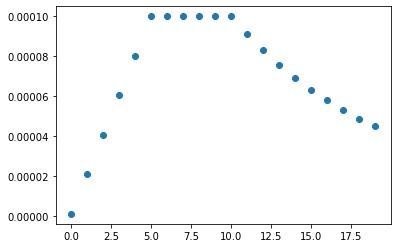

In [16]:
plt.scatter(epochs,learning_rates)
plt.show()

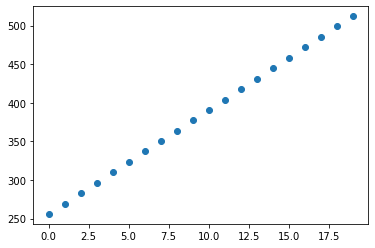

In [17]:
plt.scatter(epochs,resolutions)
plt.show()

In [1]:
import pandas as pd

In [46]:
test_df = pd.read_csv('test_neighbors2.csv', index_col=0)

In [3]:
from tqdm.notebook import tqdm

In [26]:
sample_list = ['938b7e931166', '5bf17305f073', '7593d2aee842', '7362d7a01d00','956562ff2888']
# exclude = ['37c7aba965a5', '114207cab555']

n_new = 0
predictions = {}
for i,row in tqdm(test_df.iterrows()):
    if row.image in predictions:
        if len(predictions[row.image])==5:
            continue
        predictions[row.image].append(row.target)
    elif row.confidence > 0.6 and row.target:
        predictions[row.image] = [row.target,'new_individual']
    else:
        n_new += 1
        predictions[row.image] = ['new_individual',row.target]
        
for x in tqdm(predictions):
    if len(predictions[x])<5:
        remaining = [y for y in sample_list if y not in predictions]
        predictions[x] = predictions[x]+remaining
        predictions[x] = predictions[x][:5]
    predictions[x] = ' '.join(predictions[x])

print(f'[INFO] New individual share {round(n_new / len(predictions), 3)}')

predictions = pd.Series(predictions).reset_index()
predictions.columns = ['image','predictions']
predictions.to_csv('submission.csv', index=False)

0it [00:00, ?it/s]

  0%|          | 0/27956 [00:00<?, ?it/s]

[INFO] New individual share 0.063


In [60]:
sample_list = ['new_individual', '5bf17305f073', '7593d2aee842', '7362d7a01d00','956562ff2888']
exclude = ['37c7aba965a5', '114207cab555']

In [61]:
predictions = []

for image, frame in tqdm(test_df.groupby('image')):
    img_predictions = []

    for i, pred in frame.iterrows():
        if len(img_predictions) == 5:
            break
        if pred['target'] in exclude:
            continue
        if pred['confidence'] > 0.49:
            img_predictions.append(pred['target'])
        else:
            if 'new_individual' in img_predictions:
                img_predictions.append(pred['target'])
            else:
                img_predictions.append('new_individual')
                
        if len(img_predictions) < 5:
            num_append = 5 - len(img_predictions)
            for i in range(num_append):
                img_predictions.append(sample_list[i])  
        
        if img_predictions[0] == 'new_individual':
            n_new += 1
    predictions.append({'image': image,
                         'predictions': ' '.join(img_predictions)})


pred_csv = pd.DataFrame(predictions)
pred_csv.to_csv('submission.csv', index=False)
    

  0%|          | 0/27956 [00:00<?, ?it/s]

In [62]:
print(f'[INFO] New individual share {round(n_new / len(predictions), 3)}')

[INFO] New individual share 0.146
